In [1]:
import pandas as pd
import sklearn
import numpy as np
import math
import string
import seaborn as sns
import matplotlib as mp
import matplotlib.pyplot as plt
import pylab as pl

df = pd.read_csv(r'Downloads\JetNtuple_RunIISummer16_13TeV_MC_csv_100k_2.csv')

In [2]:
dfqg = df[(df.isPhysG==1) | (df.isPhysUDS==1)].reset_index()
dfqg=dfqg.drop(['index','EventNum' ], axis=1)
pd.set_option('display.max_columns', 100)
dfqg.head(25)

,Unnamed: 0,jetPt,jetEta,jetPhi,jetMass,jetGirth,jetArea,jetRawPt,jetRawMass,jetLooseID,jetTightID,jetGenMatch,jetQGl,QG_ptD,QG_axis2,QG_mult,partonFlav,hadronFlav,physFlav,isPhysUDS,isPhysG,isPhysOther,isPartonUDS,isPartonG,isPartonOther,jetChargedHadronMult,jetNeutralHadronMult,jetChargedMult,jetNeutralMult,jetMult,nPF,PF_pT,PF_dR,PF_dTheta,PF_dPhi,PF_dEta,PF_mass,PF_id,PF_fromPV,PF_fromAK4Jet,genJetPt,genJetEta,genJetPhi,genJetMass,nGenJetPF,genJetPF_pT,genJetPF_dR,genJetPF_dTheta,genJetPF_mass,genJetPF_id,eventJetMult,jetPtOrder,dPhiJetsLO,dEtaJetsLO,alpha,event,run,lumi,pthat,eventWeight,rhoAll,rhoCentral,rhoCentralNeutral,rhoCentralChargedPileUp,PV_npvsGood,Pileup_nPU,Pileup_nTrueInt
0,0,201.199550,-0.455842,-1.927541,20.587746,0.041613,0.488692,191.304140,19.575197,1,1,1,0.978515,0.489665,0.009762,16,-2,0,-2,1,0,0,1,0,0,14,0,14,12,26,109,[ 1.8154297 1.2822266 3.7207031 3.03125 ...,[1.0493158 0.51397204 0.289036 0.03030716 0...,[ 0.72416794 -0.6175661 -0.3974595 0.444518...,[ 6.95184708e-01 -2.97616839e-01 -1.11879230e-...,[ 0.78599095 0.4190364 0.26650488 0.027361...,[ 1.3952637e-01 1.3952637e-01 1.3952637e-01 ...,[ 211 211 -211 -211 -211 211 211 -211 -211 ...,[3 3 3 3 3 3 3 3 2 2 0 0 0 0 0 0 0 0 0 0 0 1 0...,[0 0 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0...,201.982960,-0.452516,-1.926215,20.592997,27,[38.15625 37.90625 28.078125 23.328125...,[0.00902054 0.00931706 0.01466413 0.00629412 0...,[-2.2449236 3.06987 -1.937795 1.708994...,[ 1.3952637e-01 1.3952637e-01 -2.3841858e-07 ...,[ -211 211 22 22 22 22 211 -2...,3,0,2.585887,-0.470722,0.592001,2063618,1,10749,333.959720,8.630000e-07,12.192383,12.626963,1.784393,8.661064,15,17,14.003437
1,3,1263.015700,0.024581,-1.778938,65.909690,0.019175,0.498665,1196.449300,62.435963,1,1,1,0.980843,0.464368,0.005259,21,-1,0,-1,1,0,0,1,0,0,15,5,15,9,24,57,[3.63476562e+00 3.75976562e+00 1.06933594e+00 ...,[0.40648416 0.14637692 0.53210837 0.28929234 0...,[ 0.7316456 0.6776594 -1.3794131 -1.355993...,[ 0.27157003 0.09177413 -0.52239317 -0.282643...,[ 0.3024551 0.11403382 0.10121605 0.061664...,[ 1.3952637e-01 1.3952637e-01 1.3952637e-01 ...,[-211 -211 211 211 211 -211 211 -211 -211 ...,[3 3 3 3 3 3 3 2 3 2 2 2 2 2 1 1 0 1 3 3 2 2 2...,[0 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 1 0 0...,1230.496300,0.019065,-1.781667,36.297882,26,[4.32000000e+02 1.36500000e+02 1.12500000e+02 ...,[0.00738081 0.00692464 0.00569316 0.00853607 0...,[ 1.3485683 -2.3331108 -0.5262823 2.218214...,[ 4.9365234e-01 1.3952637e-01 1.3952637e-01 ...,[-321 211 -211 -211 130 211 130 -211 321 ...,4,0,2.961258,0.626809,0.477828,2063617,1,10749,953.220700,7.690000e-09,3.713232,4.643364,0.000000,2.627680,9,11,10.769351
2,12,82.229380,-1.320099,-2.670095,15.429768,0.134551,0.508639,75.368790,14.142426,1,1,1,0.002463,0.277553,0.070929,25,21,0,21,0,1,0,0,1,0,18,2,18,21,39,146,[ 1.7880859 1.1904297 1.5185547 4.34375 ...,[0.59618616 0.5022531 0.36156008 0.14491841 0...,[ 0.7709469 0.8441528 -0.54715025 0.315834...,[ 0.4154313 0.3753883 -0.18810368 0.045013...,[ 0.42761523 0.33367926 0.30877614 0.137750...,[ 1.3952637e-01 1.3952637e-01 1.3952637e-01 ...,[ 211 -211 211 211 -211 211 211 -211 -211 ...,[3 3 3 2 3 3 3 3 2 3 3 2 3 2 2 0 0 0 0 0 1 0 1...,[0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0...,76.315570,-1.327128,-2.680369,13.124958,27,[13.40625 12.65625 5.7226562 5.007812...,[0.03176612 0.03377973 0.15334162 0.08610515 0...,[-2.5777044 1.2143203 -0.6682337 2.720798...,[ 4.9755859e-01 1.3952637e-01 1.3952637e-01 ...,[ 310 211 -211 -211 22 211 -211 211 22 ...,3,0,2.748459,-1.369172,0.466182,2063623,1,10749,52.266624,3.634132e-03,20.798702,24.020477,4.898797,14.185976,25,35,26.679888
3,13,48.539627,0.049073,0.864631,12.076053,0.213575,0.498665,49.997986,12.438873,1,1,1,0.028400,0.321609,0.114792,16,21,0,21,0,1,0,0,1,0,17,0,17,9,26,184,[2.1015625 1.6992188 3.1152344 3.3066406 2...,[0.5123496 0.49553227 0.28382164 0.2360376 0...,[-0.9616224 0.9486994 -0.31651402 0.007620...,[-0.42018867 0.40269843 -0.08834109 0.001798...,[ 0.293161

In [3]:
from sklearn.model_selection import train_test_split
SEED=12
train, test = train_test_split(dfqg, test_size=0.2, random_state=SEED)

train_y = train.isPhysG
test_y = test.isPhysG


In [4]:
features= ['jetPt', 'jetEta', 'jetPhi', 'jetMass', 'jetGirth', 'jetArea', 'jetQGl',
       'QG_ptD', 'QG_axis2', 'QG_mult', 'jetChargedHadronMult',
       'jetNeutralHadronMult', 'jetChargedMult', 'jetNeutralMult', 'jetMult',
       'nPF', 'dPhiJetsLO', 'dEtaJetsLO']
train_x = train[features]
test_x = test[features]
train_x

,jetPt,jetEta,jetPhi,jetMass,jetGirth,jetArea,jetQGl,QG_ptD,QG_axis2,QG_mult,jetChargedHadronMult,jetNeutralHadronMult,jetChargedMult,jetNeutralMult,jetMult,nPF,dPhiJetsLO,dEtaJetsLO
29729,452.375340,-0.209956,2.838991,29.887484,0.026880,0.508639,0.989681,0.433086,0.007396,16,19,3,19,7,26,139,-2.988846,-0.076987
43817,228.605640,0.197099,1.530630,48.165466,0.193548,0.688158,0.615608,0.419146,0.015394,21,16,5,16,17,33,140,-2.713622,-1.263397
48604,541.208900,-0.658036,-2.685943,33.678074,0.015358,0.528585,0.999264,0.628013,0.003022,14,17,1,17,10,27,148,3.122181,0.365483
7074,246.241180,1.196961,2.569545,24.951660,0.050629,0.508639,0.224866,0.284870,0.017903,23,27,1,27,18,45,255,2.841763,-2.030725
6012,49.803886,-1.220058,1.159904,12.129569,0.190430,0.478719,0.003180,0.295662,0.129689,15,11,3,12,15,27,117,2.711074,-1.864171
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36482,56.763523,0.965887,1.243389,7.965054,0.092423,0.538559,0.994837,0.629440,0.013713,5,5,0,6,5,11,135,-2.766028,2.766919
40177,881.653000,-0.848054,-2.177413,123.051125,0.123600,0.468746,0.542437,0.392836,0.011865,29,23,3,23,15,38,98,2.952833,0.908377
19709,325.787320,1.314846,2.015896,31.496060,0.050753,0.478719,0.138807,0.302492,0.020686,31,16,4,16,29,45,134,-2.886992,0.494477
38555,124.082820,0.088719,-0.602404,21.358173,0.136085,0.498665,0.007519,0.276686,0.065313,26,19,1,20,16,36,114,3.127530,0.276174


In [5]:
#Since these feattures are on very different scales, we have to scale or normalize the features
train_x_mean = train_x.mean()
train_x_std = train_x.std()

train_x = (train_x - train_x_mean) / train_x_std
test_x = (test_x - train_x_mean) / train_x_std
train_x

,jetPt,jetEta,jetPhi,jetMass,jetGirth,jetArea,jetQGl,QG_ptD,QG_axis2,QG_mult,jetChargedHadronMult,jetNeutralHadronMult,jetChargedMult,jetNeutralMult,jetMult,nPF,dPhiJetsLO,dEtaJetsLO
29729,0.238151,-0.178269,1.571063,-0.219709,-1.161899,0.211502,1.444217,0.186099,-0.891083,-0.657859,-0.038765,0.476531,-0.057262,-1.058859,-0.601296,0.111349,-1.002492,-0.046873
43817,-0.389784,0.163595,0.848566,0.367015,2.577641,7.006988,0.479396,0.074352,-0.516663,-0.232236,-0.361128,1.732307,-0.378912,0.168508,-0.141848,0.133797,-0.909692,-0.821935
48604,0.487433,-0.554589,-1.479888,-0.098031,-1.420421,0.966557,1.468935,1.748592,-1.095882,-0.828108,-0.253674,-0.779244,-0.271695,-0.690649,-0.535661,0.313376,1.058033,0.242186
7074,-0.340296,1.003329,1.422270,-0.378149,-0.629045,0.211502,-0.528420,-1.001974,-0.399221,-0.061986,0.820872,-0.779244,0.800473,0.291245,0.645777,2.715245,0.963481,-1.323218
6012,-0.891531,-1.026603,0.643846,-0.789739,2.507683,-0.921078,-1.100200,-0.915466,4.834155,-0.742984,-0.898401,0.476531,-0.807779,-0.076965,-0.535661,-0.382493,0.919415,-1.214412
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36482,-0.872001,0.809261,0.689947,-0.923420,0.308683,1.344082,1.457515,1.760027,-0.595374,-1.594231,-1.543129,-1.407132,-1.451080,-1.304333,-1.585828,0.021560,-0.927362,1.811005
40177,1.442776,-0.714175,-1.199070,2.770847,1.008204,-1.298605,0.290669,-0.136540,-0.681864,0.448762,0.391054,0.476531,0.371606,-0.076965,0.186329,-0.808993,1.000932,0.596849
19709,-0.117076,1.102335,1.116537,-0.168074,-0.626270,-0.921078,-0.750387,-0.860714,-0.268924,0.619011,-0.361128,1.104419,-0.378912,1.641349,0.645777,-0.000887,-0.968149,0.326455
38555,-0.683092,0.072573,-0.329327,-0.493500,1.288333,-0.166024,-1.089009,-1.067572,1.820321,0.193388,-0.038765,-0.779244,0.049955,0.045772,0.055058,-0.449835,1.059837,0.183841


In [6]:
train_x.shape, test_x.shape, train_y.shape, test_y.shape

((39107, 18), (9777, 18), (39107,), (9777,))

In [9]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
knn = KNeighborsClassifier(n_neighbors=35)
knn.fit(train_x, train_y)
y_predknn = knn.predict(test_x)
print(confusion_matrix(test_y, y_predknn))

[[2170 1425]
 [ 704 5478]]


In [10]:
print(classification_report(test_y, y_predknn))

              precision    recall  f1-score   support

           0       0.76      0.60      0.67      3595
           1       0.79      0.89      0.84      6182

    accuracy                           0.78      9777
   macro avg       0.77      0.74      0.75      9777
weighted avg       0.78      0.78      0.78      9777



In [13]:
from sklearn import metrics
k_range = list(range(1, 50))
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(train_x, train_y)
    y_pred_KNN = knn.predict(test_x)
    scores.append(metrics.accuracy_score(test_y, y_pred_KNN))
import matplotlib.pyplot as plt

# allow plots to appear within the notebook
%matplotlib inline

# plot the relationship between K and testing accuracy
plt.plot(k_range, scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')
#Wilcoxon rank-sum test is a good test to compare classifiers

KeyboardInterrupt: 

In [14]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import GradientBoostingClassifier
learn_rate_list = np.linspace(0.001, 2,150)
n_estimators_list = list(range(100,500))
min_samples_leaf_list = list(range(1,25))
param_grid = {'learning_rate' : learn_rate_list,
             'min_samples_leaf' : min_samples_leaf_list, 'n_estimators': n_estimators_list}

random_GBM_class = RandomizedSearchCV(estimator = GradientBoostingClassifier(),
                                 param_distributions = param_grid,
                                 scoring = 'accuracy',
                                 n_jobs=-1, cv=20, refit=True,
                                 return_train_score = True)
random_GBM_class.fit(train_x, train_y)

RandomizedSearchCV(cv=20, error_score='raise-deprecating',
                   estimator=GradientBoostingClassifier(criterion='friedman_mse',
                                                        init=None,
                                                        learning_rate=0.1,
                                                        loss='deviance',
                                                        max_depth=3,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                    

In [15]:
gradboost = random_GBM_class.best_estimator_
gradboost.fit(train_x, train_y)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.16199328859060405, loss='deviance',
                           max_depth=3, max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=11, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=411,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [19]:
import pickle
# save the classifier
with open('gradboost.pkl', 'wb') as fid:
    pickle.dump(gradboost, fid) #SAVE

In [21]:
with open('gradboost.pkl', 'rb') as fid:
    gradboost_loaded = pickle.load(fid)


In [23]:
print("Training set score: %f" % gradboost_loaded.score(train_x, train_y))      
print("Test set score:     %f" % gradboost_loaded.score(test_x,  test_y))#Great

Training set score: 0.809471
Test set score:     0.787358


In [24]:
print(random_GBM_class.best_params_)

{'n_estimators': 411, 'min_samples_leaf': 11, 'learning_rate': 0.16199328859060405}


In [33]:
# training it again
from sklearn.model_selection import GridSearchCV
n_estimators =411
min_samples_leaf= 11
learning_rate= 0.16199328859060405
param_test_2 = {'max_depth':range(5,16,2), 'min_samples_split':range(200,1001,200)}
grid_GBM_class = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.16199328859060405, n_estimators =411,min_samples_leaf= 11),
                                 param_grid = param_test_2,
                                 scoring = 'accuracy',
                                 n_jobs=-1, cv=10, refit=True,
                                 return_train_score = True)

In [34]:
grid_GBM_class.fit(train_x, train_y)

KeyboardInterrupt: 

C:\Users\aa18dg\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


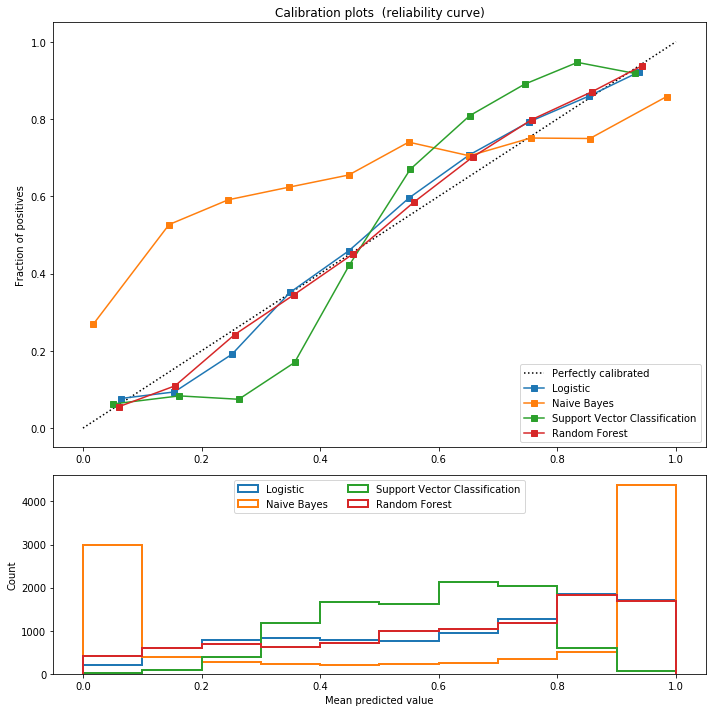

<Figure size 432x288 with 0 Axes>

In [38]:
import numpy as np
np.random.seed(0)

import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.calibration import calibration_curve



# Create classifiers
lr = LogisticRegression(solver='lbfgs')
gnb = GaussianNB()
svc = LinearSVC(C=1.0)
rfc = RandomForestClassifier(n_estimators=100)


# #############################################################################
# Plot calibration plots

plt.figure(figsize=(10, 10))
ax1 = plt.subplot2grid((3, 1), (0, 0), rowspan=2)
ax2 = plt.subplot2grid((3, 1), (2, 0))

ax1.plot([0, 1], [0, 1], "k:", label="Perfectly calibrated")
for clf, name in [(lr, 'Logistic'),
                  (gnb, 'Naive Bayes'),
                  (svc, 'Support Vector Classification'),
                  (rfc, 'Random Forest')]:
    clf.fit(train_x, train_y)
    if hasattr(clf, "predict_proba"):
        prob_pos = clf.predict_proba(test_x)[:, 1]
    else:  # use decision function
        prob_pos = clf.decision_function(test_x)
        prob_pos = \
            (prob_pos - prob_pos.min()) / (prob_pos.max() - prob_pos.min())
    fraction_of_positives, mean_predicted_value = \
        calibration_curve(test_y, prob_pos, n_bins=10)

    ax1.plot(mean_predicted_value, fraction_of_positives, "s-",
             label="%s" % (name, ))

    ax2.hist(prob_pos, range=(0, 1), bins=10, label=name,
             histtype="step", lw=2)

ax1.set_ylabel("Fraction of positives")
ax1.set_ylim([-0.05, 1.05])
ax1.legend(loc="lower right")
ax1.set_title('Calibration plots  (reliability curve)')

ax2.set_xlabel("Mean predicted value")
ax2.set_ylabel("Count")
ax2.legend(loc="upper center", ncol=2)

plt.tight_layout()
plt.show()
plt.savefig('calibration_curve1.png')

In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import roc_curve, roc_auc_score

# Instantiate the classfiers and make a list
classifiers = [LogisticRegression(random_state=1234), 
               GaussianNB(), 
               KNeighborsClassifier(), 
               DecisionTreeClassifier(random_state=1234),
               RandomForestClassifier(random_state=1234)]

# Define a result table as a DataFrame
result_table = pd.DataFrame(columns=['classifiers', 'fpr','tpr','auc'])

# Train the models and record the results
for cls in classifiers:
    model = cls.fit(train_x, train_y)
    yproba = model.predict_proba(test_x)[::,1]
    
    fpr, tpr, _ = roc_curve(test_y,  yproba)
    auc = roc_auc_score(test_y, yproba)
    
    result_table = result_table.append({'classifiers':cls.__class__.__name__,
                                        'fpr':fpr, 
                                        'tpr':tpr, 
                                        'auc':auc}, ignore_index=True)

# Set name of the classifiers as index labels
result_table.set_index('classifiers', inplace=True)


C:\Users\aa18dg\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\aa18dg\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


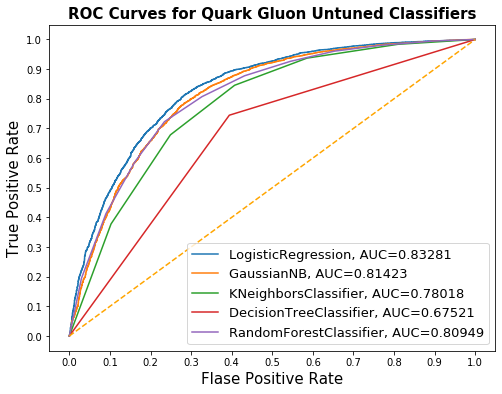

<Figure size 432x288 with 0 Axes>

In [41]:
fig = plt.figure(figsize=(8,6))

for i in result_table.index:
    plt.plot(result_table.loc[i]['fpr'], 
             result_table.loc[i]['tpr'], 
             label="{}, AUC={:.5f}".format(i, result_table.loc[i]['auc']))
    
plt.plot([0,1], [0,1], color='orange', linestyle='--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("Flase Positive Rate", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)

plt.title('ROC Curves for Quark Gluon Untuned Classifiers', fontweight='bold', fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')

plt.show()
plt.savefig('log_GNB_Decision_random_untuned.png')

In [43]:
# logistic regression has a 'penalty' hyperparameter which specifies whether to use 'l1' or 'l2' regularization.
#Here I create a hold-out set, tune the 'C' and 'penalty' hyperparameters of a logistic regression classifier using GridSearchCV on the training set, and then evaluate its performance against the hold-out set.
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Create the hyperparameter grid
c_space = np.logspace(-5, 8, 15)
param_grid = {'C': c_space, 'penalty': ['l1', 'l2']}

# Instantiate the logistic regression classifier: logreg
logreg = LogisticRegression()

# Create train and test sets

# Instantiate the GridSearchCV object: logreg_cv
logreg_cv = GridSearchCV(logreg, param_grid, cv=5)

# Fit it to the training data
logreg_cv.fit(train_x, train_y)

# Print the optimal parameters and best score
print("Tuned Logistic Regression Parameter: {}".format(logreg_cv.best_params_))
print("Tuned Logistic Regression Accuracy: {}".format(logreg_cv.best_score_))



C:\Users\aa18dg\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\aa18dg\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\aa18dg\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\aa18dg\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\aa18dg\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\

Tuned Logistic Regression Parameter: {'C': 268.2695795279727, 'penalty': 'l2'}
Tuned Logistic Regression Accuracy: 0.7715754212800777


Tuned Logistic Regression Parameter: {'C': 268.2695795279727, 'penalty': 'l2'}
Tuned Logistic Regression Accuracy: 0.7715754212800777

In [59]:
classifiers = [LogisticRegression(C=268.2695795279727,penalty= 'l2'), 
               GaussianNB(), 
               KNeighborsClassifier(), 
               DecisionTreeClassifier(),
               RandomForestClassifier()]
eg=0.2
eq=0.3

result_table = pd.DataFrame(columns=['classifiers', 'fpr','tpr','auc', 'DP'])

# Train the models and record the results
for cls in classifiers:
    model = cls.fit(train_x, train_y)
    yproba = model.predict_proba(test_x)[::,1]
    
    Dp_num = yproba*(-2*eq+1)+eq
    Dp_den= yproba*(2*eg-2*eq) - eg+eq+1
    Dp=Dp_num/Dp_den
    fpr, tpr, _ = roc_curve(test_y,  yproba)
    auc = roc_auc_score(test_y, yproba)
    fpr_dp, tpr_dp, _ = roc_curve(test_y,  Dp)
    auc_dp = roc_auc_score(test_y, Dp)
    
    result_table = result_table.append({'classifiers':cls.__class__.__name__,
                                        'fpr':fpr, 
                                        'tpr':tpr, 
                                        'auc':auc,
                                       'fpr_dp':fpr_dp,
                                       'tpr_dp':tpr_dp,
                                       'auc_dp':auc_dp}, ignore_index=True)

# Set name of the classifiers as index labels
result_table.set_index('classifiers', inplace=True)


NameError: name 'DP' is not defined

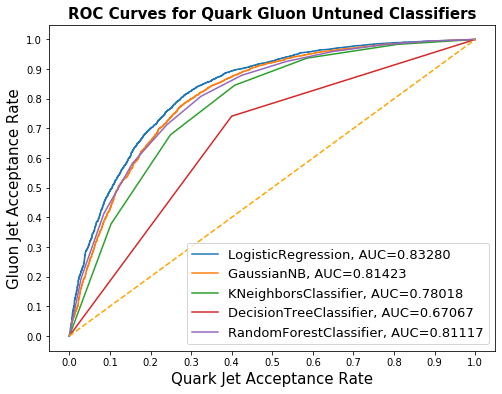

In [58]:
fig = plt.figure(figsize=(8,6))

for i in result_table.index:
    plt.plot(result_table.loc[i]['fpr'], 
             result_table.loc[i]['tpr'], 
             label="{}, AUC={:.5f}".format(i, result_table.loc[i]['auc']))
    
plt.plot([0,1], [0,1], color='orange', linestyle='--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("Quark Jet Acceptance Rate", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("Gluon Jet Acceptance Rate", fontsize=15)

plt.title('ROC Curves for Quark Gluon Untuned Classifiers', fontweight='bold', fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')

plt.show()
#plt.savefig('log_GNB_Decision_random_untuned.png')

In [60]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import roc_curve, auc, make_scorer, accuracy_score, \
    precision_score, confusion_matrix, recall_score
from sklearn.metrics import confusion_matrix
plt.style.use("ggplot")
Randfor = RandomForestClassifier(n_jobs= -1) #CAN PUT CLASS WEIGHTS HERE
#max_depth, max_features, n_estimators, min_samples_split, min_samples_leaf, bootstrap
scorers = {
    'accuracy_score': make_scorer(accuracy_score), 
    'precision_score': make_scorer(precision_score),
    'recall_score': make_scorer(recall_score)}
#'auc': make_scorer(auc),
n_estimators = [int(x) for x in np.linspace(100, 1000, 10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(start = 10, stop = 110, num = 10)]
max_depth.append(None)
min_samples_split = [3, 5, 10]
min_samples_leaf = [3, 5, 10]
bootstrap = [True, False]

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

print(random_grid)


{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 21, 32, 43, 54, 65, 76, 87, 98, 110, None], 'min_samples_split': [3, 5, 10], 'min_samples_leaf': [3, 5, 10], 'bootstrap': [True, False]}


In [62]:
learn_rate_list = np.linspace(0.001, 2,150)
min_samples_leaf_list = list(range(1,25))
param_grid = {'learning_rate' : learn_rate_list,
             'min_samples_leaf' : min_samples_leaf_list}
number_models = 10 #random grid object
random_GBM_class = RandomizedSearchCV(estimator = GradientBoostingClassifier(),
                                 param_distributions = param_grid,
                                 scoring = 'accuracy',
                                 n_jobs=-1, cv=10, refit=True,
                                 return_train_score = True)
random_GBM_class.fit(train_x, train_y)

RandomizedSearchCV(cv=10, error_score='raise-deprecating',
                   estimator=GradientBoostingClassifier(criterion='friedman_mse',
                                                        init=None,
                                                        learning_rate=0.1,
                                                        loss='deviance',
                                                        max_depth=3,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                    

Gradient Boosting Classifier

In [65]:
pred_y_gb = gradboost.predict(test_x)
Dp_num = pred_y_gb*(-2*eq+1)+eq
Dp_den= pred_y_gb*(2*eg-2*eq) - eg+eq+1
Dp=Dp_num/Dp_den

Text(0.5, 0, 'Quark jet acceptance rate')

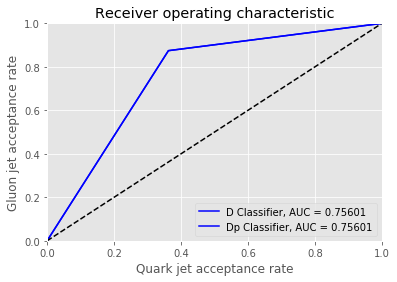

In [67]:
fpr_dgb, tpr_dgb, thresholds_dgb  = roc_curve(test_y, pred_y_gb)
roc_auc_dgb = auc(fpr_dgb, tpr_dgb)

fpr_dpgb, tpr_dpgb, thresholds_dpgb  = roc_curve(test_y, Dp)
roc_auc_dpgb = auc(fpr_dpgb, tpr_dpgb)

plt.clf()
plt.plot(fpr_dgb, tpr_dgb, 'b', label='D Classifier, AUC = %0.5f'% roc_auc_dgb)
plt.plot(fpr_dpgb, tpr_dpgb, 'b', label='Dp Classifier, AUC = %0.5f'% roc_auc_dpgb)
plt.plot([0,1], [0,1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.legend(loc = 'lower right')
plt.title("Receiver operating characteristic")
plt.ylabel('Gluon jet acceptance rate')
plt.xlabel('Quark jet acceptance rate')

In [83]:
from sklearn.neural_network import MLPRegressor
mlpdnn = MLPRegressor(hidden_layer_sizes=(18, 10), 
                    max_iter=500, 
                    alpha=1e-3,
                    solver='adam',
                    activation='relu',
                    verbose=1, 
                    tol=1e-8, 
                    random_state=1234)
mlpdnn.fit(train_x, train_y)

Iteration 1, loss = 0.31637762
Iteration 2, loss = 0.10107350
Iteration 3, loss = 0.08992808
Iteration 4, loss = 0.08596418
Iteration 5, loss = 0.08391677
Iteration 6, loss = 0.08273846
Iteration 7, loss = 0.08182038
Iteration 8, loss = 0.08109151
Iteration 9, loss = 0.08048771
Iteration 10, loss = 0.08007075
Iteration 11, loss = 0.07966062
Iteration 12, loss = 0.07933809
Iteration 13, loss = 0.07904534
Iteration 14, loss = 0.07881407
Iteration 15, loss = 0.07860573
Iteration 16, loss = 0.07844904
Iteration 17, loss = 0.07824891
Iteration 18, loss = 0.07817437
Iteration 19, loss = 0.07815004
Iteration 20, loss = 0.07794535
Iteration 21, loss = 0.07779159
Iteration 22, loss = 0.07773222
Iteration 23, loss = 0.07773696
Iteration 24, loss = 0.07763207
Iteration 25, loss = 0.07758710
Iteration 26, loss = 0.07750584
Iteration 27, loss = 0.07735417
Iteration 28, loss = 0.07738705
Iteration 29, loss = 0.07720302
Iteration 30, loss = 0.07726269
Iteration 31, loss = 0.07707117
Iteration 32, los

MLPRegressor(activation='relu', alpha=0.001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(18, 10), learning_rate='constant',
             learning_rate_init=0.001, max_iter=500, momentum=0.9,
             n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
             random_state=1234, shuffle=True, solver='adam', tol=1e-08,
             validation_fraction=0.1, verbose=1, warm_start=False)

In [84]:
print("Training set score: %10.4f" % mlpdnn.score(train_x, train_y))      
print("Test set score:     %10.4f" % mlpdnn.score(test_x,  test_y))

Training set score:     0.3619
Test set score:         0.3540


In [85]:
def plotLoss(dnn):
    y    = mlpdnn.loss_curve_
    x    = np.array(range(len(y)))+1

    ymin = 0.0
    ymax = 1.2*max(y)
    epoch= range(len(y))
    xmin = 0
    xmax = len(x)
    
    # set size of figure
    plt.figure(figsize=(8,4));

    # get axis info
    axes = plt.gca()
    # set axes' limits
    axes.set_xlim(xmin, xmax)
    axes.set_ylim(ymin, ymax)
    
    # annotate axes
    plt.xlabel(r'epoch')
    plt.ylabel(r'loss')
    
    # choose color of points
    plt.plot(x, y, 'b-')
    plt.show()


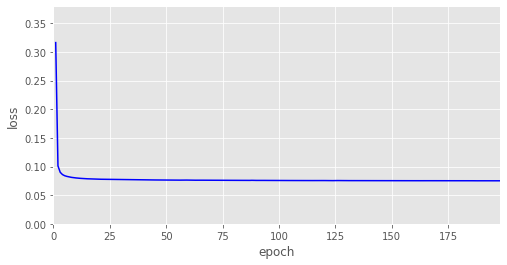

In [86]:
plotLoss(mlpdnn)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.lda import LDA
from sklearn.qda import QDA

h = .02  # step size in the mesh

names = ["Nearest Neighbors", "Linear SVM", "RBF SVM", "Decision Tree",
         "Random Forest", "AdaBoost", "Naive Bayes", "LDA", "QDA"]
classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    AdaBoostClassifier(),
    GaussianNB(),
    LDA(),
    QDA()]


rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)



figure = plt.figure(figsize=(27, 9))
i = 1
# iterate over datasets
for ds in datasets:

    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright)
    # and testing points
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6)
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1

    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)

        # Plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, m_max]x[y_min, y_max].
        if hasattr(clf, "decision_function"):
            Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
        else:
            Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

        # Plot also the training points
        ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright)
        # and testing points
        ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
                   alpha=0.6)

        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        ax.set_title(name)
        ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
                size=15, horizontalalignment='right')
        i += 1

figure.subplots_adjust(left=.02, right=.98)
plt.show()


In [87]:
from sklearn.metrics import accuracy_score, log_loss
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="rbf", C=0.025, probability=True),
    NuSVC(probability=True),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
    GaussianNB(),
    LinearDiscriminantAnalysis(),
    QuadraticDiscriminantAnalysis()]

log_cols=["Classifier", "Accuracy", "Log Loss"]
log = pd.DataFrame(columns=log_cols)

for clf in classifiers:
    clf.fit(train_x, train_y)
    name = clf.__class__.__name__
    print("="*30)
    print(name)
    print('****Results****')
    train_predictions = clf.predict(test_x)
    acc = accuracy_score(test_y, train_predictions)
    print("Accuracy: {:.4%}".format(acc))
    
    train_predictions = clf.predict_proba(test_x)
    ll = log_loss(test_y, train_predictions)
    print("Log Loss: {}".format(ll))
    
    log_entry = pd.DataFrame([[name, acc*100, ll]], columns=log_cols)
    log = log.append(log_entry)
    
print("="*30)

KNeighborsClassifier
****Results****
Accuracy: 73.8468%
Log Loss: 3.3775612051635076


C:\Users\aa18dg\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC
****Results****
Accuracy: 78.1426%
Log Loss: 0.48193595423739166


C:\Users\aa18dg\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


NuSVC
****Results****
Accuracy: 78.7256%
Log Loss: 0.47758919513551545
DecisionTreeClassifier
****Results****
Accuracy: 69.3055%
Log Loss: 10.60150025172619


C:\Users\aa18dg\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier
****Results****
Accuracy: 75.3810%
Log Loss: 1.0295516235422986
AdaBoostClassifier
****Results****
Accuracy: 78.0914%
Log Loss: 0.6826567749204802
GradientBoostingClassifier
****Results****
Accuracy: 78.7460%
Log Loss: 0.46222059338524996
GaussianNB
****Results****
Accuracy: 75.3810%
Log Loss: 0.9603912975535033
LinearDiscriminantAnalysis
****Results****
Accuracy: 77.8255%
Log Loss: 0.48364902559982875
QuadraticDiscriminantAnalysis
****Results****
Accuracy: 77.4471%
Log Loss: 0.768112850734234


C:\Users\aa18dg\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Users\aa18dg\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:693: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


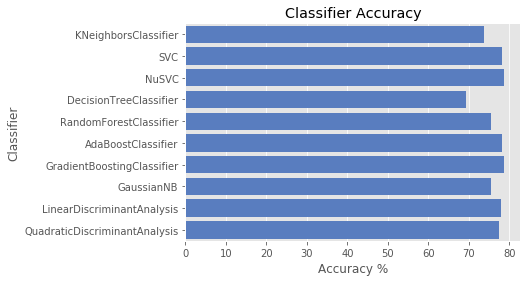

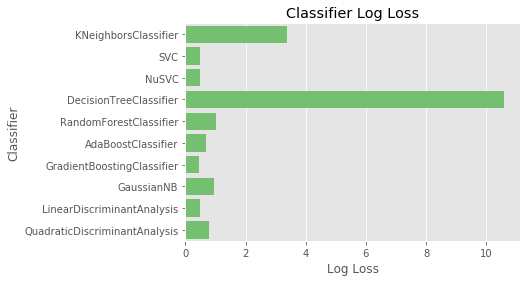

<Figure size 432x288 with 0 Axes>

In [89]:
sns.set_color_codes("muted")
sns.barplot(x='Accuracy', y='Classifier', data=log, color="b")

plt.xlabel('Accuracy %')
plt.title('Classifier Accuracy')
plt.show()
plt.savefig('untuned_classifier_accuracy.png')
sns.set_color_codes("muted")
sns.barplot(x='Log Loss', y='Classifier', data=log, color="g")

plt.xlabel('Log Loss')
plt.title('Classifier Log Loss')
plt.show()
plt.savefig('untuned_classifier_logloss.png')

In [91]:
best_features=[ 'jetGirth', 'jetQGl', 'jetPt',
       'QG_ptD', 'QG_axis2']
train_xb = df[best_features]
test_xb = test[best_features]
train_xb

,jetGirth,jetQGl,jetPt,QG_ptD,QG_axis2
29729,0.026880,0.989681,452.375340,0.433086,0.007396
43817,0.193548,0.615608,228.605640,0.419146,0.015394
48604,0.015358,0.999264,541.208900,0.628013,0.003022
7074,0.050629,0.224866,246.241180,0.284870,0.017903
6012,0.190430,0.003180,49.803886,0.295662,0.129689
...,...,...,...,...,...
36482,0.092423,0.994837,56.763523,0.629440,0.013713
40177,0.123600,0.542437,881.653000,0.392836,0.011865
19709,0.050753,0.138807,325.787320,0.302492,0.020686
38555,0.136085,0.007519,124.082820,0.276686,0.065313


In [128]:
import pandas
y=dfqg['isPhysG']

In [133]:
#from pandas.tools.plotting import scatter_matrix
#from matplotlib import cm
#cmap = cm.get_cmap('gnuplot')
scatter = pandas.plotting.scatter_matrix(dfqg[best_features], c = y,figsize=[16,40], s=150, marker = 'D')
scatter

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002970AEC1AC8>,
      dtype=object)

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x00000296E62A0B88> (for post_execute):


RuntimeError: Failed to process string with tex because latex could not be found

RuntimeError: Failed to process string with tex because latex could not be found

<Figure size 1152x2880 with 25 Axes>

In [104]:
from sklearn import tree
import pydotplus
clf = tree.DecisionTreeClassifier(random_state=0, max_depth=3)
clf.fit(train_xb, train_y)
tree.plot_tree(clf, feature_names = train_xb.columns)

ModuleNotFoundError: No module named 'pydotplus'

In [103]:
model = RandomForestClassifier(n_estimators=10)
# Train
model.fit(train_xb, train_y)
# Extract single tree
estimator = model.estimators_[5]

from sklearn.tree import export_graphviz
# Export as dot file
dot_data =export_graphviz(estimator, out_file='tree.dot', 
                feature_names = train_xb.columns,
                rounded = True, proportion = False, 
                precision = 2, filled = True)

graph = pydotplus.graph_from_dot_data(dot_data)

colors = ('turquoise', 'orange')
edges = collections.defaultdict(list)

for edge in graph.get_edge_list():
    edges[edge.get_source()].append(int(edge.get_destination()))

for edge in edges:
    edges[edge].sort()    
    for i in range(2):
        dest = graph.get_node(str(edges[edge][i]))[0]
        dest.set_fillcolor(colors[i])

graph.write_png('tree.png')


NameError: name 'pydotplus' is not defined

In [112]:
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import confusion_matrix
import matplotlib
matplotlib.rcParams['text.usetex']=True
matplotlib.rcParams['text.latex.unicode']=True
pl.rc('text', usetex=True)
%matplotlib inline
sc = StandardScaler()

C:\Users\aa18dg\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:12: MatplotlibDeprecationWarning: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
  if sys.path[0] == '':


In [115]:
classifiers = [LogisticRegression(random_state=0),
               SVC(kernel="rbf", random_state=0),
               GaussianNB(),
               DecisionTreeClassifier(criterion='entropy', random_state=0, min_samples_split=20),
               RandomForestClassifier(n_estimators=30, n_jobs=4,
                                      criterion='entropy',
                                      random_state=0, min_samples_split=40),
               KNeighborsClassifier(p=2)]
names = ["Logistic Regression", "Kernel SVM", "Naive Bayes",
         "Decision Tree", "Random Forest", "K-Nearest Neighbors"]

fig, axs = pl.subplots(3, 2, sharex="all", sharey="all", figsize=(8, 10))

for ax, name, classifier in zip(np.array(axs).flatten(), names, classifiers):
    classifier = classifier.fit(train_x, train_y)
    y_pred = classifier.predict(test_x)
    
    cm = confusion_matrix(test_y, y_pred)

    N = 1000
    x1 = np.linspace(10, 70, N)
    x2 = np.linspace(0, 175, N)
    X1, X2 = np.meshgrid(x1, x2)
    y_grid = classifier.predict(sc.transform(np.hstack([X1.flatten()[:, None],
                                                        X2.flatten()[:, None]])))

    pl.sca(ax)
    pl.contourf(x1, x2, y_grid.reshape((N, N)), cmap="Set1", alpha=.4)
    pl.contour(x1, x2, y_grid.reshape((N, N)), colors="black", linestyles="--")
    pl.scatter(*X.T, c=train_y,
               cmap="Set1", marker=".")
    
    table = (r"\begin{tabular}{ c || c | c } "
             r"  & +  & - \\ \hline \hline"
             r"+ & %i & %i \\ \hline"
             r"- & %i & %i \\"
             r"\end{tabular}") % tuple(cm.flatten().tolist())
    pl.text(44, 105, table, size=12, bbox=dict(facecolor='white',
                                               edgecolor='black',
                                               alpha=.8,
                                               pad=10))

    pl.title(name)

fig.text(0.5, 0.09, 'Age', ha='center', va='center')
fig.text(0.07, 0.5, 'Salary (k\$)', ha='center', va='center', rotation='vertical')
fig.savefig("classifiers_comparison.png", dpi=300)


C:\Users\aa18dg\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


NotFittedError: This StandardScaler instance is not fitted yet. Call 'fit' with appropriate arguments before using this method.

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x00000296E62A0B88> (for post_execute):


RuntimeError: Failed to process string with tex because latex could not be found

RuntimeError: Failed to process string with tex because latex could not be found

<Figure size 576x720 with 6 Axes>

In [134]:
from yellowbrick.classifier import DiscriminationThreshold
visualizer = DiscriminationThreshold(random_GBM_class)
visualizer.fit(train_x, train_y)
visualizer.show()

KeyboardInterrupt: 

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x00000296E62A0B88> (for post_execute):


RuntimeError: Failed to process string with tex because latex could not be found

RuntimeError: Failed to process string with tex because latex could not be found

<Figure size 576x396 with 1 Axes>